In [4]:
# Check the versions of libraries
# Python version 
import sys 
print('Python: {}'.format(sys.version)) 
# scipy 
import scipy 
print('scipy: {}'.format(scipy.__version__ ))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib 
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) 
# pandas 
import pandas 
print('pandas:{}'.format(pandas. __version__ ))
# scikit-learn 
import sklearn
print('sklearn: {}'.format(sklearn.__version__  )) 

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas:1.1.3
sklearn: 0.23.2


In [37]:
# Load libraries 
import pandas 

from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 


In [70]:
url = "C:\\Users\\silmkawer\\iris_csv.csv"
dataset = pandas.read_csv('iris_csv.csv', names = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], header=0)

In [71]:
print(dataset.shape)

(150, 5)


In [72]:
print(dataset.head(33))

print(dataset[10:21])


    sepallength  sepalwidth  petallength  petalwidth        class
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
14        

In [19]:
print(dataset.de
      scribe())

       sepal-length sepal-width petal-length petal-width           class
count           151         151          151         151             151
unique           36          24           44          23               4
top             5.0         3.0          1.5         0.2  Iris-virginica
freq             10          26           14          28              50


In [53]:
print(dataset.groupby('class').size())

class
Iris-setosa        41
Iris-versicolor    50
Iris-virginica     50
dtype: int64


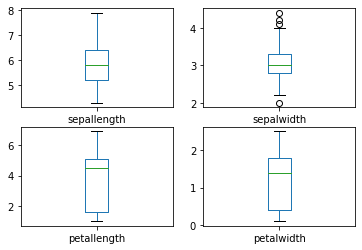

In [55]:

dataset.plot(kind='box', subplots=True, layout=(2,2),sharex=False,sharey=False )
plt.show()




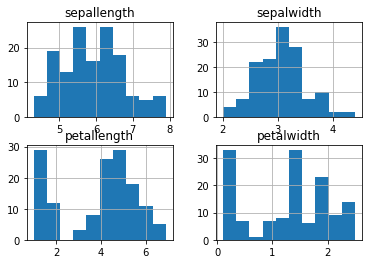

In [57]:
dataset.hist()
plt.show()

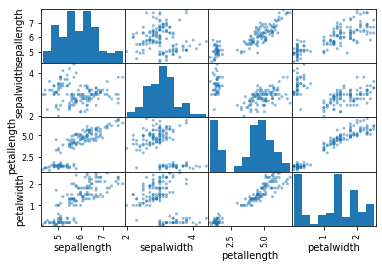

In [58]:
scatter_matrix(dataset)
plt.show()

In [62]:
array = dataset.values

X = array[:,0:4]

Y = array[:,4]

validation_size = 0.20

seed = 6

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size =validation_size,random_state=seed)

In [63]:
seed = 6
scoring = 'accuracy'

In [66]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB() ))
models.append(('SVM', SVC()))
# evaluate ech model in turn 
results=[]
names = []

for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results= model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"% (name, cv_results.mean(),cv_results.std())
    print(msg)

E:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

LR: 0.956061 (0.059920)
LDA: 0.982576 (0.034890)
KNN: 0.965152 (0.042748)
CART: 0.938636 (0.068304)
NB: 0.964394 (0.059656)
SVM: 0.956061 (0.059920)


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [67]:
# then LDA algorithm is the most accurate model : 0.982576 (0.034890)